In [1]:
import pandas as pd
df = pd.read_excel('Airlines+Data.xlsx')

In [2]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

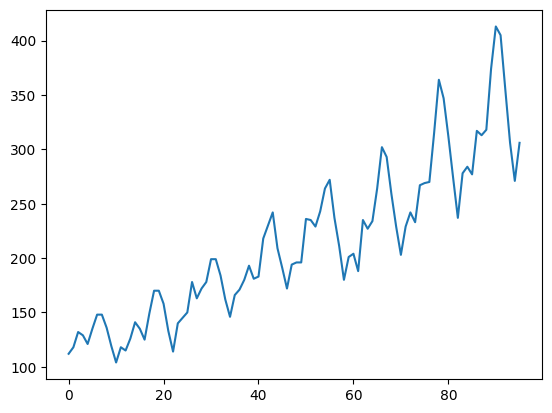

In [3]:
import matplotlib.pyplot as plt
plt.plot(range(0,96),df['Passengers'])

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

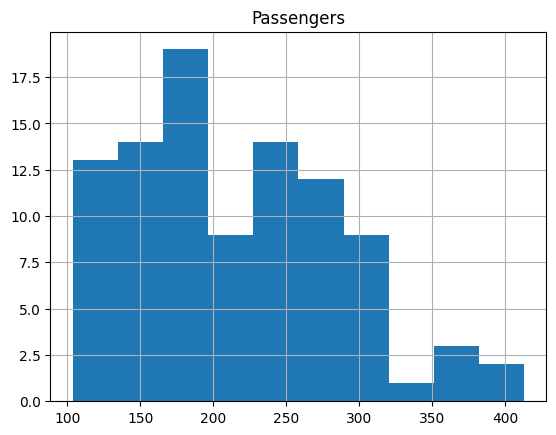

In [4]:
df.hist('Passengers')

<Axes: ylabel='Density'>

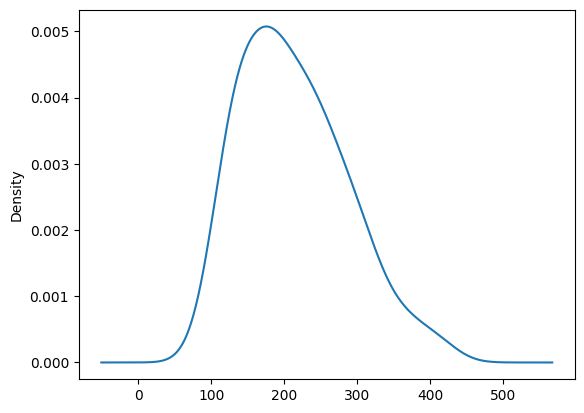

In [6]:
df['Passengers'].plot(kind='kde')

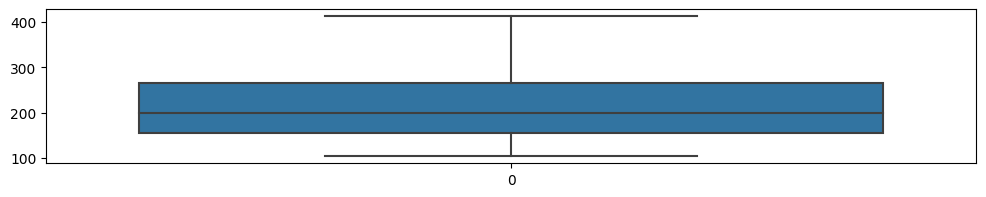

In [7]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Passengers'], whis=1.5)

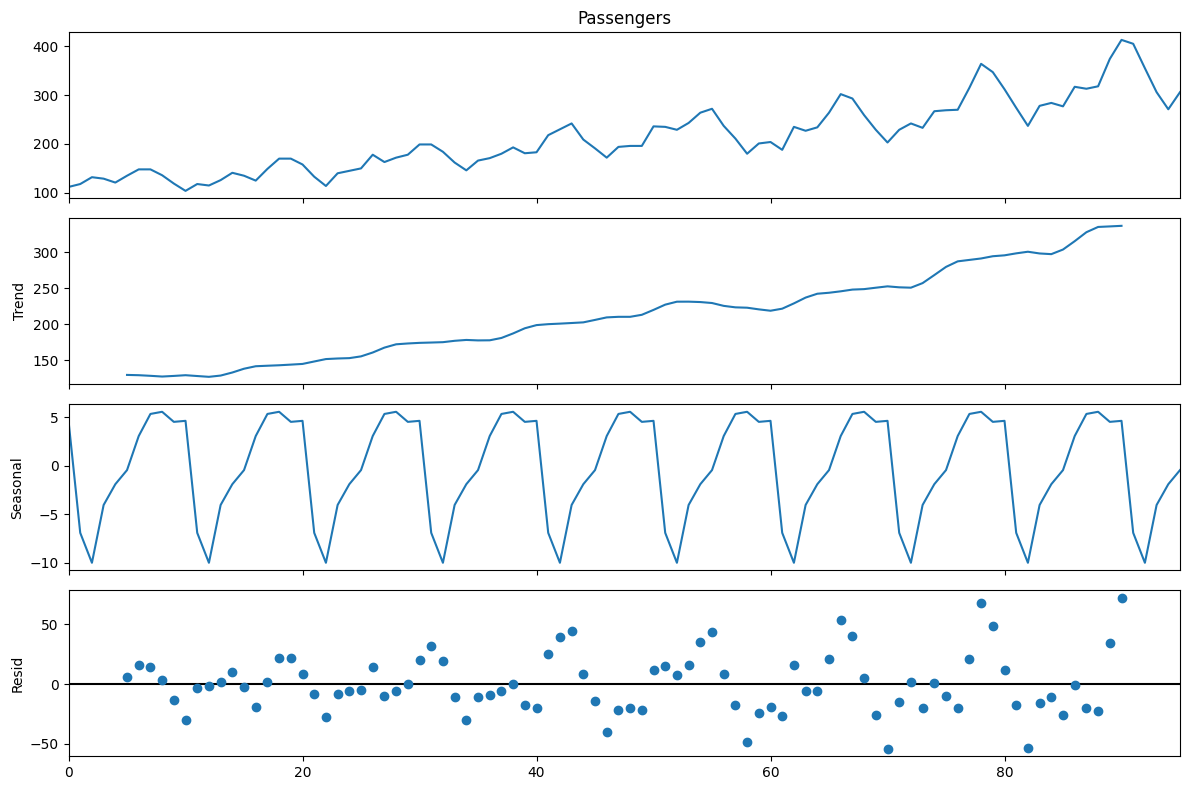

In [12]:
from pylab import rcParams
import statsmodels.api as sma
rcParams['figure.figsize'] = 12,8
decomposition = sma.tsa.seasonal_decompose(df.Passengers, model='additive',period = 10)
fig = decomposition.plot()
plt.show()

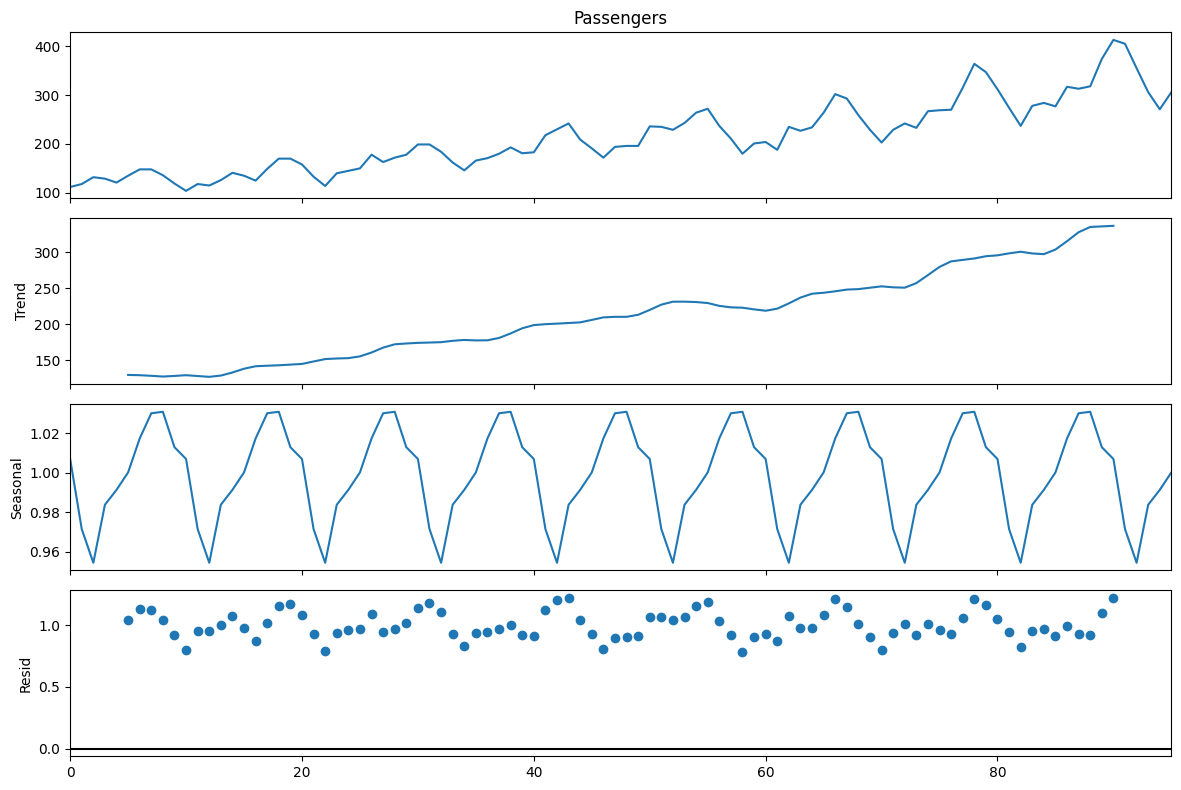

In [13]:
decomposition = sma.tsa.seasonal_decompose(df.Passengers, model='multiplicative',period = 10)
fig = decomposition.plot()
plt.show()

In [14]:
train_len = 80
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

In [15]:
train.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [16]:
test.head()

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284


In [17]:
y_hat_naive = test.copy()
y_hat_naive.head()

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284


In [18]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [19]:
y_hat_naive.head()

,Month,Passengers,naive_forecast
80,2001-09-01,312,347
81,2001-10-01,274,347
82,2001-11-01,237,347
83,2001-12-01,278,347
84,2002-01-01,284,347


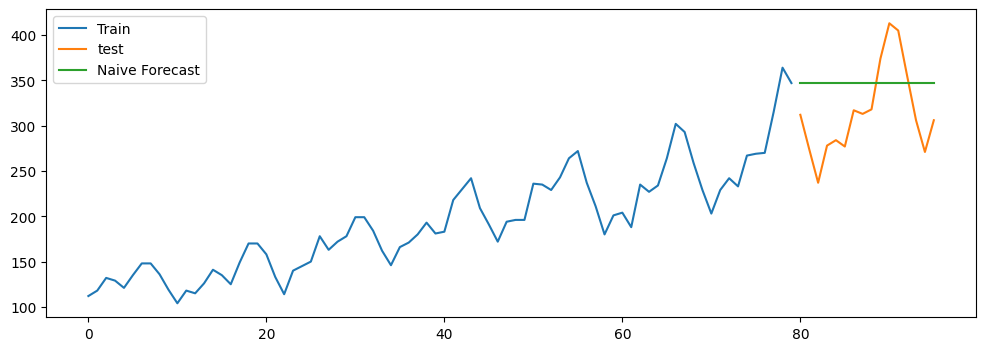

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

In [21]:
y_hat_avg = test.copy()

In [22]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [23]:
y_hat_avg.head()

,Month,Passengers,avg_forecast
80,2001-09-01,312,193.45
81,2001-10-01,274,193.45
82,2001-11-01,237,193.45
83,2001-12-01,278,193.45
84,2002-01-01,284,193.45


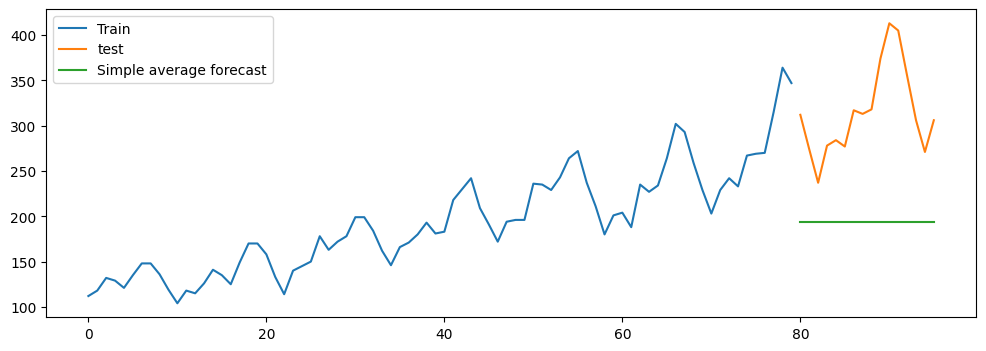

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

57.46

In [27]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

17.54

In [28]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,57.46,17.54


In [29]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse

130.58

In [30]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

37.25

In [31]:
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

<ipython-input-31-c857b136e015>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)


,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25


In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [33]:
model = SimpleExpSmoothing(train['Passengers'])
# Fit the model with alpha = 0.2

model_fit = model.fit(smoothing_level = 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
y_hat_ses = test.copy()
# Forecast for 16 months
y_hat_ses['ses_forecast'] = model_fit.forecast(16)

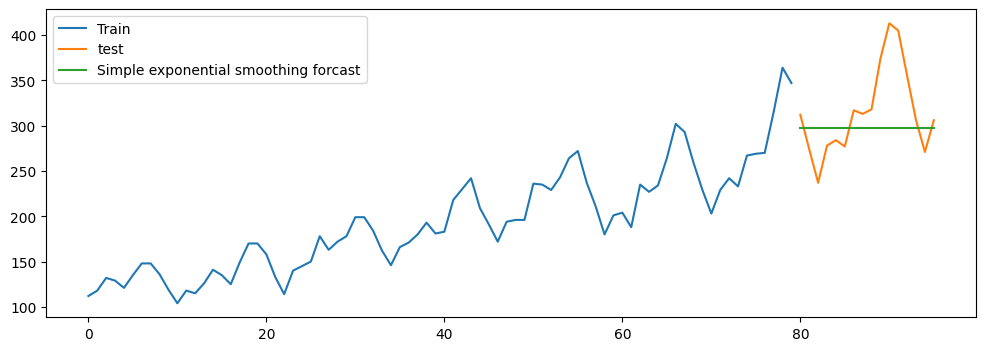

In [35]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse

50.86

In [37]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100),2)
mape

11.38

In [38]:
results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

<ipython-input-38-4d13176e288e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'Simple expenential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)


,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38


In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_ES= ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12) #add the trend to the model
model_ES_fit = model_ES.fit(smoothing_level=0.1, smoothing_slope=0.2)
model_ES_fit.params

<ipython-input-39-d88e69900884>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_ES_fit = model_ES.fit(smoothing_level=0.1, smoothing_slope=0.2)


{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 0.7121476792461447,
 'damping_trend': nan,
 'initial_level': 121.79733942683934,
 'initial_trend': 0.6387112510536401,
 'initial_seasons': array([-11.71594189,  -5.49374164,   8.48343118,   3.41250677,
         -4.82040014,   9.79714894,  23.1599372 ,  21.55196119,
          7.55631488, -12.30233592, -28.98320674, -13.52488824]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [40]:
y_hat_es = test.copy()
y_hat_es['es_forecast'] = model_ES_fit.forecast(16)

In [41]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_es['es_forecast'])).round(2)
rmse

12.78

In [42]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_es['es_forecast'])/test['Passengers'])*100),2)
mape

3.15

In [43]:
results = results.append({'Method':'expenential smoothing with additive seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

<ipython-input-43-ad9f1cf31aa1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'expenential smoothing with additive seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)


,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,expenential smoothing with additive seasonalit...,12.78,3.15


In [44]:
model_ES_mu_ad= ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12) #add the trend to the model
model_ES_mu_ad_fit = model_ES_mu_ad.fit(smoothing_level=0.1, smoothing_slope=0.2)
model_ES_mu_ad_fit.params

<ipython-input-44-ecd47495b5ba>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_ES_mu_ad_fit = model_ES_mu_ad.fit(smoothing_level=0.1, smoothing_slope=0.2)


{'smoothing_level': 0.1,
 'smoothing_trend': 0.2,
 'smoothing_seasonal': 1.2008013830346186e-13,
 'damping_trend': nan,
 'initial_level': 98.28961883821083,
 'initial_trend': 0.26210182419974326,
 'initial_seasons': array([1.07851897, 1.06200222, 1.23013263, 1.18463223, 1.17216005,
        1.30915036, 1.45203989, 1.42800841, 1.23623002, 1.08177454,
        0.93795153, 1.05810458]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
y_hat_es_mu_ad = test.copy()
y_hat_es_mu_ad['es_mu_ad_forecast'] = model_ES_mu_ad_fit.forecast(16)

In [46]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_es_mu_ad['es_mu_ad_forecast'])).round(2)
rmse

14.07

In [47]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_es_mu_ad['es_mu_ad_forecast'])/test['Passengers'])*100),2)
mape

3.86

In [48]:
results = results.append({'Method':'expenential smoothing with multilicative seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

<ipython-input-48-8673bc77352f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'expenential smoothing with multilicative seasonality ,additive trend', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)


,Method,RMSE,MAPE
0,Naive method,57.46,17.54
1,Simple average method,130.58,37.25
2,Simple expenential smoothing method,50.86,11.38
3,expenential smoothing with additive seasonalit...,12.78,3.15
4,expenential smoothing with multilicative seaso...,14.07,3.86
